In [16]:
import colour
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
red_wavelength = 644
green_wavelength = 515 
blue_wavelength = 467.83

In [18]:
def create_theta_array(height, width, angle_of_view=np.radians(40)):
    theta = np.linspace(-angle_of_view, angle_of_view, width)
    phi = np.linspace(0, 2*np.pi, height)
    THETA, PHI = np.meshgrid(theta, phi)
    X = np.sin(THETA) * np.cos(PHI)
    Y = np.sin(THETA) * np.sin(PHI)
    return np.arcsin(np.sqrt(X**2 + Y**2))

def wavelength_to_rgb(wavelength, intensity):
    visible_wavelength = np.clip(wavelength, 380, 750)
    xyz = colour.wavelength_to_XYZ(visible_wavelength)
    rgb = colour.XYZ_to_sRGB(xyz)
    rgb = (intensity[:, :, np.newaxis] / 255 * rgb)
    rgb = np.clip(rgb*255, 0, 255).astype(int)
    return rgb

def transform_wavelength(wavelength, theta, beta):
    gamma = 1 / np.sqrt(1 - beta ** 2)
    return wavelength / (gamma * (1 - beta * np.cos(theta)))

def transform_rgb(red_channel, green_channel, blue_channel, THETA, beta):
    red_wavelength_trans = transform_wavelength(red_wavelength, THETA, beta)
    green_wavelength_trans = transform_wavelength(green_wavelength, THETA, beta)
    blue_wavelength_trans = transform_wavelength(blue_wavelength, THETA, beta)

    red_channel_trans = wavelength_to_rgb(red_wavelength_trans, red_channel)
    green_channel_trans = wavelength_to_rgb(green_wavelength_trans, green_channel)
    blue_channel_trans = wavelength_to_rgb(blue_wavelength_trans, blue_channel)

    rgb_trans = np.clip(red_channel_trans + green_channel_trans + blue_channel_trans, 0, 255)
    return rgb_trans

def transform_image(file, beta, angle_of_view=np.radians(40)):
    image = Image.open(f'images/originals/{file}')
    image = image.convert('RGB')
    pixels = np.array(image)

    red_channel = pixels[:, :, 0] 
    green_channel = pixels[:, :, 1]
    blue_channel = pixels[:, :, 2]
    height, width, _ = pixels.shape

    THETA = create_theta_array(height, width, angle_of_view)
    transformed_pixels = transform_rgb(red_channel, green_channel, blue_channel, THETA, beta)

    fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=100)
    ax.imshow(transformed_pixels)
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.savefig(f'images/blueshifted/{file}', bbox_inches='tight', pad_inches=0)
    plt.show()

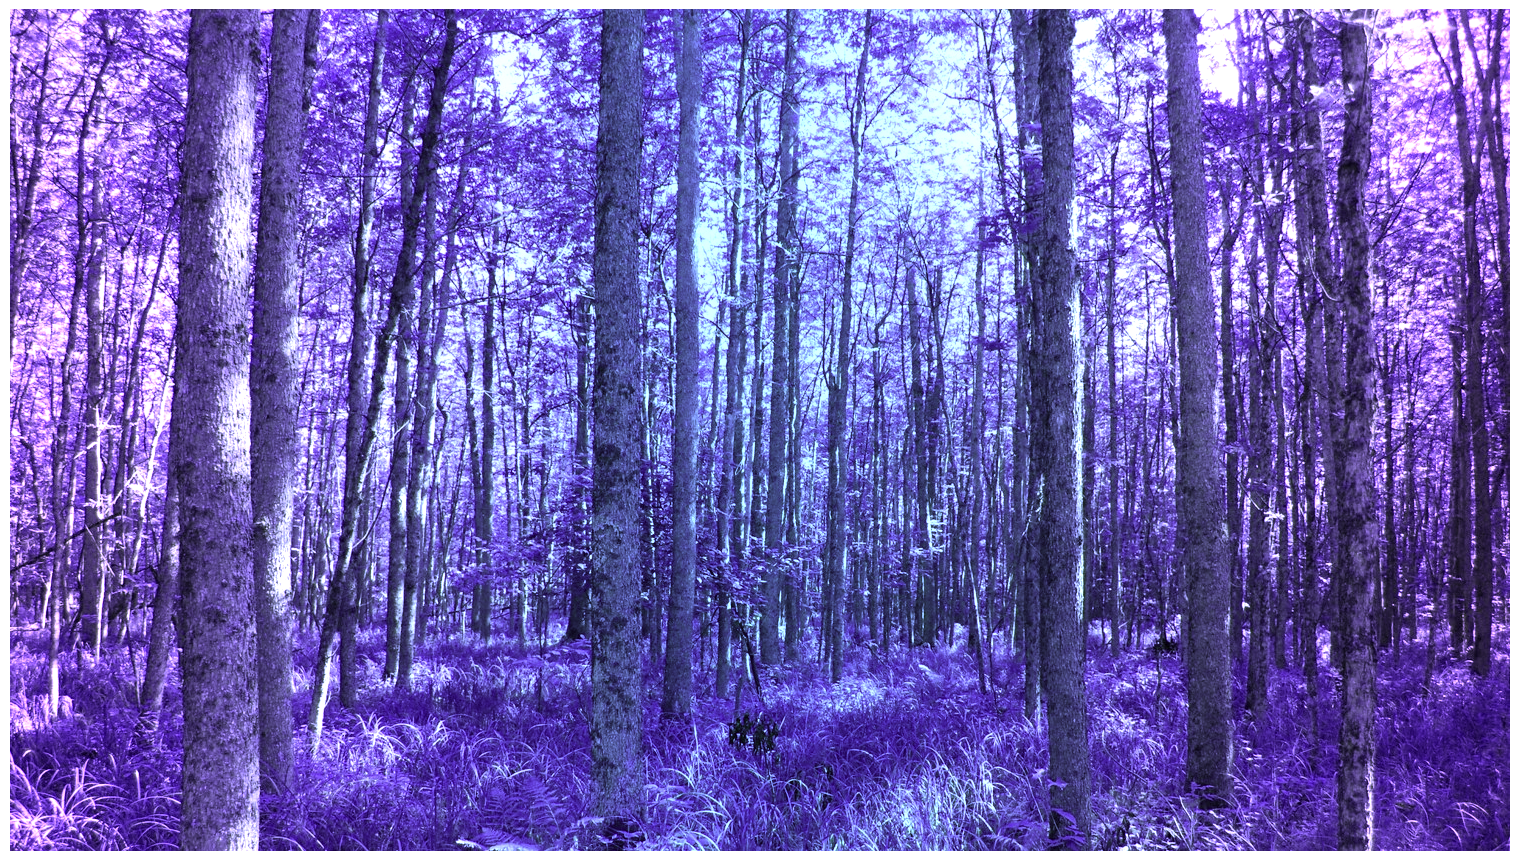

In [42]:
transform_image('trees.jpg', -0.15, angle_of_view=np.radians(30))